In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Capstone Project 2 (Covid-19 Prediction )

1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?

-  Predicting COVID-19 accurately is crucial in today's world to enhance medical treatment and resource allocation. Accurate predictions enable early identification of positive cases, leading to prompt isolation and treatment, thus reducing the spread of the virus. This can significantly impact healthcare systems by preventing overwhelming surges and ensuring timely and appropriate care for affected individuals.

2. How is it going to impact the medical field when it comes to effective screening and reducing healthcare burden?

- Accurate prediction models contribute to effective screening by identifying individuals at high risk, allowing targeted testing and resource allocation. This can reduce the burden on healthcare systems by optimizing the use of limited resources, including testing kits, medical personnel, and hospital facilities. Early identification also facilitates timely intervention and management, potentially minimizing the severity of cases.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any other disease?

- The proposed method can serve as a blueprint for predicting and managing other infectious diseases. By understanding the relationships between symptoms, demographic factors, and disease outcomes, the model can be adapted to forecast the likelihood of other diseases, filling a crucial gap in early detection and intervention.

# Problem Statement 

- Develop an accurate machine learning model for COVID-19 diagnosis using individual characteristics, symptoms, and contact history. Objectives include improving diagnostic accuracy, optimizing screening processes for higher-risk individuals, reducing healthcare burden through early identification, and establishing a versatile framework for future infectious disease prediction. This project aims to provide a practical tool for effective disease management in the current and potential future outbreaks.

# Hypotheses

- Age Hypothesis: People aged 60 and above are more likely to test positive for COVID-19 compared to younger individuals.

 
- Symptom Hypothesis: Specific symptoms like cough, fever, and shortness of breath play a significant role in predicting COVID-19 status.


- Contact History Hypothesis: Individuals with a known contact with confirmed COVID-19 cases are more likely to test positive.


- Model Suitability Hypothesis: Different machine learning models, including logistic regression, decision trees, random forests, and support vector machines, capture unique aspects of the data. The hypothesis is that one model will outperform others in terms of accuracy and reliability for COVID-19 prediction

# 1.Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corona_raw=pd.read_csv('corona_tested_006.csv')

corona=corona_raw.copy()

corona

C:\Users\abhis\AppData\Local\Temp\ipykernel_9088\4144330762.py:6: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona_raw=pd.read_csv('corona_tested_006.csv')


Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          False  False       False   
278844  278845  30-04-2020          False  False       False   
278845  278846  30-04-2020          False  False       False   
278846  278847  30-04-2020          False  False       False   
278847  278848  30-04-2020          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative         None    None   
1                    FALSE    FALSE  positive         None    None   
2                    FALSE    FALSE  positive         None    None   
3                    FALSE    FALSE  negative         None    None   
4                    FALSE    FALSE  negative         None    None   
...                    ...      ...       ...          ...     ...   
278843               False    False  positive         None    male   
278844               False    False  negative         None  female   
278845               False    False  negative         None    male   
278846               False    False  negative         None    male   
278847               False    False  negative         None  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

In [3]:
# Display the dimensions (rows, columns) of the corona Dataset
corona_shape = corona.shape
print("Shape of credit_card DataFrame:", corona_shape)

Shape of credit_card DataFrame: (278848, 11)


In [4]:
# Display the total number of elements in the corona Dataset
corona_size = corona.size
print("Total elements in credit_card DataFrame:", corona_size)

Total elements in credit_card DataFrame: 3067328


- The corona dataset consists of 278,848 records and 11 columns, representing individual cases tested for COVID-19. With a total of 3,067,328 data points, this dataset provides comprehensive information for developing and evaluating predictive models for COVID-19 diagnosis based on various features such as age, symptoms, and contact history.

In [5]:
#Checking all the features
corona.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [6]:
# Display concise summary information about the corona Dataset
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


- The corona dataset consists of 278,848 entries with 11 columns. It includes information on various aspects such as individual identification (Ind_ID), test date (Test_date), and symptoms like cough (Cough_symptoms), fever (Fever), sore throat (Sore_throat), shortness of breath (Shortness_of_breath), headache (Headache), COVID-19 test result (Corona), age group above 60 (Age_60_above), gender (Sex), and known contact with a confirmed case (Known_contact). The dataset utilizes a mix of data types, including integers for identification and objects (likely strings) for categorical variables. The non-null count indicates that there are no missing values in the dataset. 

In [7]:
# Display a summary statistics table for all columns in the corona DataFrame, including categorical variables
corona.describe(include='all')

Ind_ID   Test_date Cough_symptoms   Fever Sore_throat  \
count   278848.000000      278848         278848  278848      278848   
unique            NaN          51              5       5           5   
top               NaN  20-04-2020          False   False       False   
freq              NaN       10921         127531  137774      212584   
mean    139424.500000         NaN            NaN     NaN         NaN   
std      80496.628269         NaN            NaN     NaN         NaN   
min          1.000000         NaN            NaN     NaN         NaN   
25%      69712.750000         NaN            NaN     NaN         NaN   
50%     139424.500000         NaN            NaN     NaN         NaN   
75%     209136.250000         NaN            NaN     NaN         NaN   
max     278848.000000         NaN            NaN     NaN         NaN   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
count               278848   278848    278848       278848  278848   
unique                   5        5         3            3       3   
top                  False    False  negative         None  female   
freq                212842   212326    260227       127320  130158   
mean                   NaN      NaN       NaN          NaN     NaN   
std                    NaN      NaN       NaN          NaN     NaN   
min                    NaN      NaN       NaN          NaN     NaN   
25%                    NaN      NaN       NaN          NaN     NaN   
50%                    NaN      NaN       NaN          NaN     NaN   
75%                    NaN      NaN       NaN          NaN     NaN   
max                    NaN      NaN       NaN          NaN     NaN   

       Known_contact  
count         278848  
unique             3  
top            Other  
freq          242741  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

- Ind_ID: Individual identification number assigned to each record.

- Test_date: Date when the COVID-19 test was conducted.

- Cough_symptoms: Presence or absence of cough symptoms (True/False).

- Fever: Presence or absence of fever symptoms (True/False).

- Sore_throat: Presence or absence of sore throat symptoms (True/False).

- Shortness_of_breath: Presence or absence of shortness of breath symptoms (True/False).

- Headache: Presence or absence of headache symptoms (True/False).

- Corona: COVID-19 test result (Positive, Negative, None).

- Age_60_above: Age group indicator, True if the individual is 60 years or above, False otherwise.

- Sex: Gender of the individual (Male, Female, Other).

- Known_contact: ndicates the type of contact with COVID-19 cases, including general contact(other), contact during travel abroad, and direct contact with confirmed cases.

In [8]:
#Checking Data types
corona.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [9]:
# Display the number of unique values in each column of the corona dataset
unique_value_counts = corona.nunique()
print(unique_value_counts)

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64


- Handling the mixed data types 

In [10]:
# Columns to check
columns_to_check = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Loop through the columns
for column_name in columns_to_check:
    # Extract the column
    current_column = corona[column_name]
    
    # Check the data type of the entire column
    column_dtype = current_column.dtype
    
    # Check the number of unique values in the column
    unique_values_count = current_column.nunique()
    
    # Check if there are multiple data types in the column
    if unique_values_count > 1:
        print(f"The column '{column_name}' in the 'corona' dataset has multiple data types.")
        print(f"Data type of the column: {column_dtype}")
        print(f"Number of unique values: {unique_values_count}")
        print("\n")
    else:
        print(f"The column '{column_name}' in the 'corona' dataset has a single data type: {column_dtype}")
        print("\n")


The column 'Cough_symptoms' in the 'corona' dataset has multiple data types.
Data type of the column: object
Number of unique values: 5


The column 'Fever' in the 'corona' dataset has multiple data types.
Data type of the column: object
Number of unique values: 5


The column 'Sore_throat' in the 'corona' dataset has multiple data types.
Data type of the column: object
Number of unique values: 5


The column 'Shortness_of_breath' in the 'corona' dataset has multiple data types.
Data type of the column: object
Number of unique values: 5


The column 'Headache' in the 'corona' dataset has multiple data types.
Data type of the column: object
Number of unique values: 5




In [11]:
# Columns to check
columns_to_check = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Loop through the columns
for column_name in columns_to_check:
    # Extract the column
    current_column = corona_raw[column_name]
    
    # Extract unique data types in the column
    unique_data_types = set(current_column.apply(type))
    
    # Print the unique data types present in the column
    print(f"Unique data types in the '{column_name}' column: {unique_data_types}")
    print("\n")


Unique data types in the 'Cough_symptoms' column: {<class 'str'>, <class 'bool'>}


Unique data types in the 'Fever' column: {<class 'str'>, <class 'bool'>}


Unique data types in the 'Sore_throat' column: {<class 'str'>, <class 'bool'>}


Unique data types in the 'Shortness_of_breath' column: {<class 'str'>, <class 'bool'>}


Unique data types in the 'Headache' column: {<class 'str'>, <class 'bool'>}




In [12]:
# Columns to check
columns_to_check = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Loop through the columns
for column_name in columns_to_check:
    # Extract the column
    current_column = corona_raw[column_name]
    
    # Iterate through unique values and print their types
    print(f"Unique values and their types in the '{column_name}' column:")
    for unique_value in current_column.unique():
        print(f"Value: {unique_value}, Type: {type(unique_value)}")
    print("\n")


Unique values and their types in the 'Cough_symptoms' column:
Value: TRUE, Type: <class 'str'>
Value: FALSE, Type: <class 'str'>
Value: None, Type: <class 'str'>
Value: False, Type: <class 'bool'>
Value: True, Type: <class 'bool'>


Unique values and their types in the 'Fever' column:
Value: FALSE, Type: <class 'str'>
Value: TRUE, Type: <class 'str'>
Value: None, Type: <class 'str'>
Value: False, Type: <class 'bool'>
Value: True, Type: <class 'bool'>


Unique values and their types in the 'Sore_throat' column:
Value: TRUE, Type: <class 'str'>
Value: FALSE, Type: <class 'str'>
Value: None, Type: <class 'str'>
Value: False, Type: <class 'bool'>
Value: True, Type: <class 'bool'>


Unique values and their types in the 'Shortness_of_breath' column:
Value: FALSE, Type: <class 'str'>
Value: TRUE, Type: <class 'str'>
Value: None, Type: <class 'str'>
Value: False, Type: <class 'bool'>
Value: True, Type: <class 'bool'>


Unique values and their types in the 'Headache' column:
Value: FALSE, Type:

- Conversion of String Representations to Boolean Values

In [13]:
# Columns to check
columns_to_check = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Loop through the columns
for column_name in columns_to_check:
    # Convert string representations to boolean values
    corona[column_name] = corona[column_name].replace({'TRUE': True, 'FALSE': False})

# Verify the changes
for column_name in columns_to_check:
    # Display unique values and their types after conversion
    unique_values = corona[column_name].unique()
    print(f"Unique values in the '{column_name}' column after conversion: {unique_values}")
    print(f"Data types in the '{column_name}' column after conversion: {set(corona[column_name].apply(type))}")
    print("\n")

Unique values in the 'Cough_symptoms' column after conversion: [True False 'None']
Data types in the 'Cough_symptoms' column after conversion: {<class 'str'>, <class 'bool'>}


Unique values in the 'Fever' column after conversion: [False True 'None']
Data types in the 'Fever' column after conversion: {<class 'str'>, <class 'bool'>}


Unique values in the 'Sore_throat' column after conversion: [True False 'None']
Data types in the 'Sore_throat' column after conversion: {<class 'str'>, <class 'bool'>}


Unique values in the 'Shortness_of_breath' column after conversion: [False True 'None']
Data types in the 'Shortness_of_breath' column after conversion: {<class 'str'>, <class 'bool'>}


Unique values in the 'Headache' column after conversion: [False True 'None']
Data types in the 'Headache' column after conversion: {<class 'str'>, <class 'bool'>}




In [14]:
# Convert 'Test_date' to datetime format
corona['Test_date'] = pd.to_datetime(corona['Test_date'], format='%d-%m-%Y')

# 2. Exploratory Data Analysis(EDA)

# 2.1. Univariate Analysis and Bivariate analysis with label(target variable)

- Creating a function to explore the each feature or column

In [15]:
# Sample value_cnt_norm_cal function
def value_cnt_norm_cal(df, feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = (ftr_value_cnt / len(df)) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

# Function to display general information about a column
def column_summary(df, feature):
    print("Column Name:", feature)
    print("*" * 50)

    if df[feature].dtype == 'object':
        print("Description (Categorical):")
        value_counts = value_cnt_norm_cal(df, feature)
        print(value_counts)
    else:
        print("Description (Numerical):")
        
        if df[feature].dtype == 'datetime64[ns]':
            print(df[feature].describe(datetime_is_numeric=True))
        else:
            print(df[feature].describe())

    print("*" * 50)
    print("Object Type:")
    print(df[feature].dtype)
    print("*" * 50)


# 2.1.1. Test Date

In [16]:
column_summary(corona,'Test_date')

Column Name: Test_date
**************************************************
Description (Numerical):
count                           278848
mean     2020-04-10 11:50:32.361716480
min                2020-03-11 00:00:00
25%                2020-04-01 00:00:00
50%                2020-04-12 00:00:00
75%                2020-04-21 00:00:00
max                2020-04-30 00:00:00
Name: Test_date, dtype: object
**************************************************
Object Type:
datetime64[ns]
**************************************************


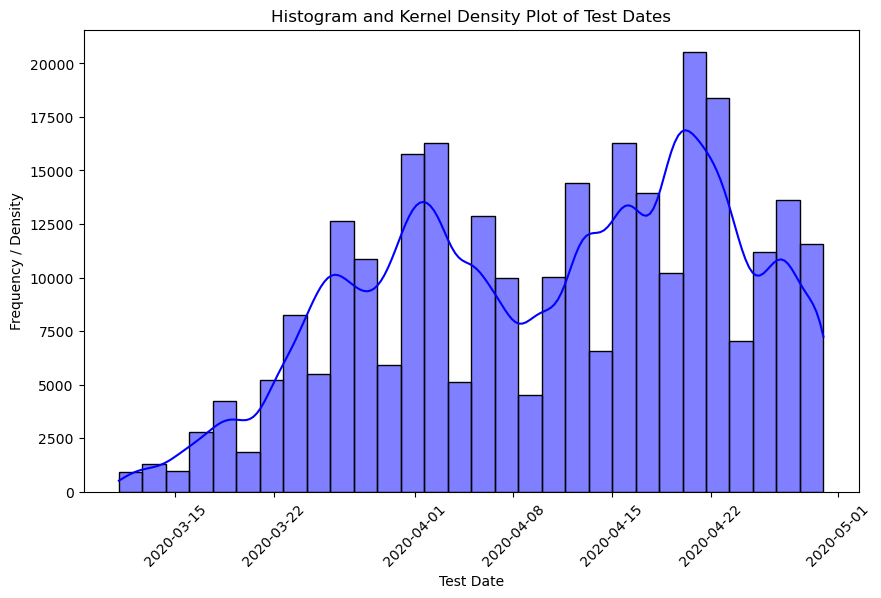

In [17]:
# Plotting a combined histogram and kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(corona['Test_date'], bins=30, kde=True, color='blue')
plt.title('Histogram and Kernel Density Plot of Test Dates')
plt.xlabel('Test Date')
plt.ylabel('Frequency / Density')
plt.xticks(rotation=45)
plt.show()

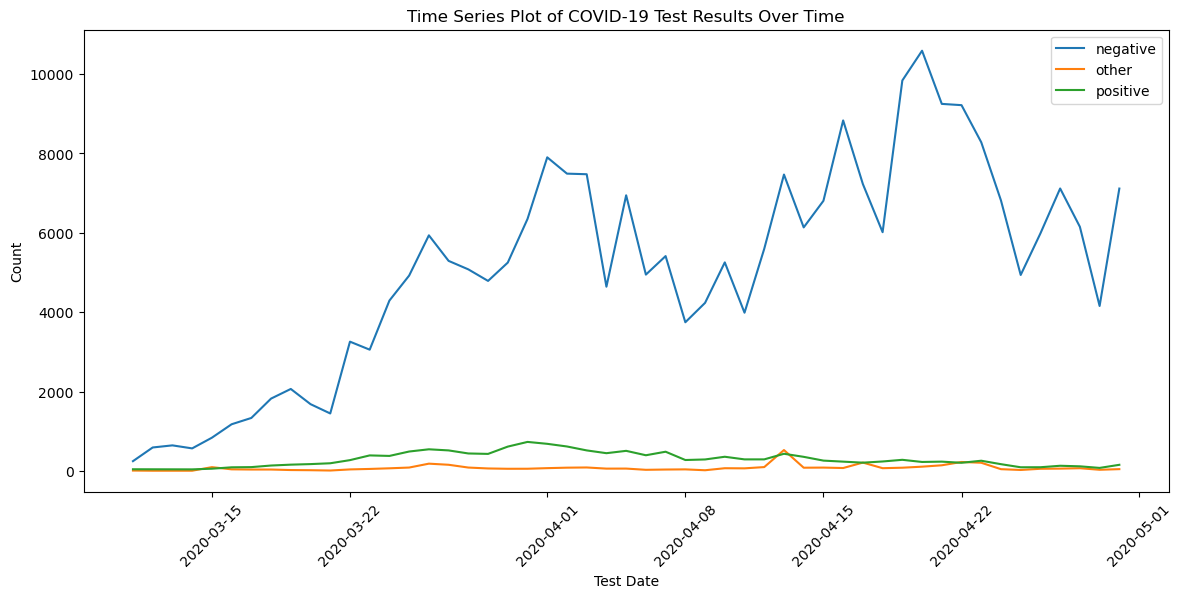

Corona      negative  other  positive
Test_date                            
2020-03-11       245      8        41
2020-03-12       590      4        40
2020-03-13       643      4        39
2020-03-14       567      4        38
2020-03-15       836     94        55
2020-03-16      1175     39        90
2020-03-17      1334     34        95
2020-03-18      1822     34       135
2020-03-19      2065     21       157
2020-03-20      1682     17       171
2020-03-21      1447      9       192
2020-03-22      3257     37       271
2020-03-23      3055     49       390
2020-03-24      4293     65       377
2020-03-25      4923     84       488
2020-03-26      5937    182       544
2020-03-27      5293    154       516
2020-03-28      5079     84       439
2020-03-29      4788     61       428
2020-03-30      5250     53       612
2020-03-31      6350     54       730
2020-04-01      7903     69       682
2020-04-02      7492     81       615
2020-04-03      7477     86       516
2020-04-04  

In [18]:
# Group data by date and count occurrences for each category
result_counts = corona.groupby(['Test_date', 'Corona']).size().unstack(fill_value=0)

# Plotting a line plot for each category
plt.figure(figsize=(14, 6))
for category in result_counts.columns:
    sns.lineplot(x=result_counts.index, y=result_counts[category], label=category)

plt.title('Time Series Plot of COVID-19 Test Results Over Time')
plt.xlabel('Test Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display counts
print(result_counts)

- Interpretation

1. Negative Results:
- The count of negative results has been consistently high throughout the observed period.
- There's a notable increase in negative cases from mid-March to mid-April, indicating a substantial number of people testing negative for COVID-19.

2. Positive Results:

- The count of positive results shows some fluctuations over time.
- There might be specific periods where the number of positive cases increased or decreased, reflecting the dynamics of the outbreak.

3. Other Results:

- The 'other' category shows variations but generally has lower counts compared to negative and positive results.
- It's important to understand the nature of the 'other' category to interpret its significance accurately. It may include inconclusive results or cases that don't fall clearly into positive or negative categories.

4. Overall Trends:

- The overall trend suggests an increase in testing capacity or changes in testing criteria, as seen by the rising number of tests conducted over time.
- Peaks and troughs in positive cases could indicate waves or clusters of infections.

# 2.1.2 Cough Symptoms

In [19]:
column_summary(corona,'Cough_symptoms')

Column Name: Cough_symptoms
**************************************************
Description (Categorical):
        Count  Frequency (%)
False  236368      84.765894
True    42228      15.143734
None      252       0.090372
**************************************************
Object Type:
object
**************************************************


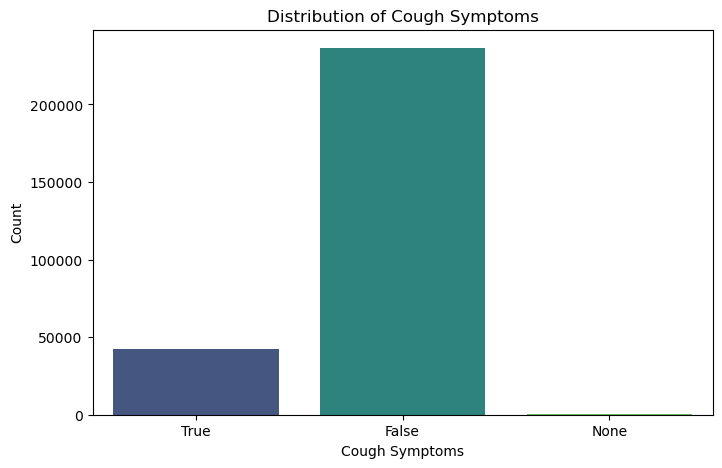

In [20]:
# Plotting the distribution of 'Cough_symptoms'
plt.figure(figsize=(8, 5))
sns.countplot(x='Cough_symptoms', data=corona, palette='viridis')
plt.title('Distribution of Cough Symptoms')
plt.xlabel('Cough Symptoms')
plt.ylabel('Count')
plt.show()

- Bivariate analysis with target variable

Corona          negative  other  positive
Cough_symptoms                           
False             225021   3235      8112
True               34987    657      6584
None                 219      0        33


<Figure size 800x600 with 0 Axes>

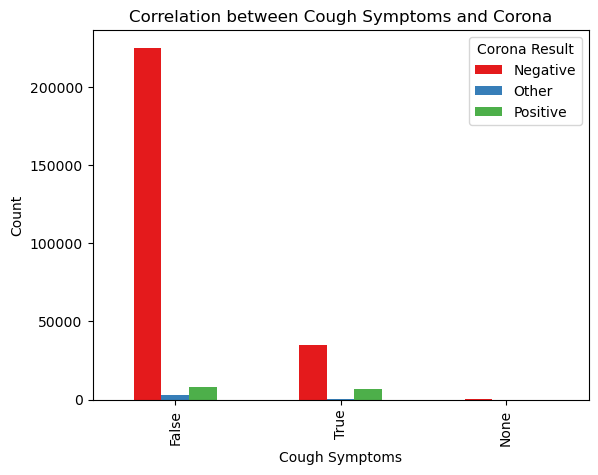

In [21]:
# Create a cross-tabulation between 'Cough_symptoms' and 'Corona'
cross_table = pd.crosstab(corona['Cough_symptoms'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Correlation between Cough Symptoms and Corona')
plt.xlabel('Cough Symptoms')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

- Interpretation

1. Count and Frequency Distribution:
- The majority of the individuals in the dataset (84.77%) do not exhibit cough symptoms ('Cough_symptoms: False').
- A smaller portion (15.14%) show symptoms of cough ('Cough_symptoms: True').
- A very small percentage (0.09%) has an undefined or missing value for cough symptoms ('Cough_symptoms: None').

2. Correlation with Corona Test Results:
- Among those without cough symptoms (False), the majority tested negative for Corona.This suggests that the absence of cough symptoms is generally associated with a negative test result for COVID-19.
- Individuals with cough symptoms (True) show a mix of negative and positive test results, with a higher count of negative results.The higher count of negative results among those with cough symptoms might indicate that other factors, besides cough, contribute to the likelihood of testing negative.
- The 'None' category has an insignificant count but indicates missing or undefined data.

# 2.1.3 Fever

In [22]:
column_summary(corona,'Fever')

Column Name: Fever
**************************************************
Description (Categorical):
        Count  Frequency (%)
False  256844      92.108963
True    21752       7.800666
None      252       0.090372
**************************************************
Object Type:
object
**************************************************


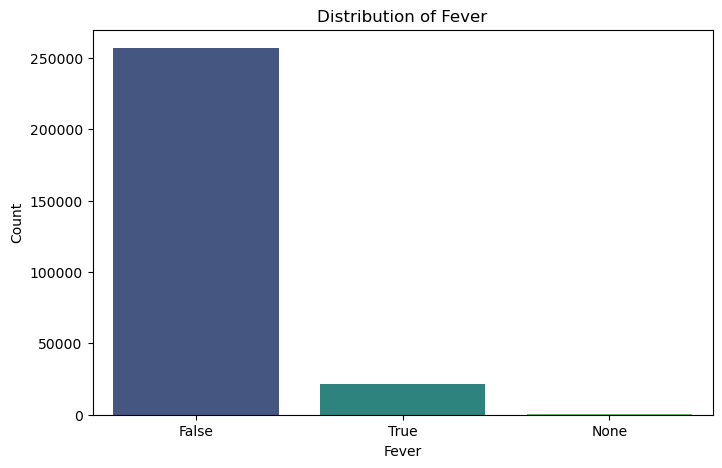

In [23]:
# Plotting the distribution of 'Fever'
plt.figure(figsize=(8, 5))
sns.countplot(x='Fever', data=corona, palette='viridis')
plt.title('Distribution of Fever')
plt.xlabel('Fever')
plt.ylabel('Count')
plt.show()

- Bivariate Analysis with target variable

Corona  negative  other  positive
Fever                            
False     244192   3515      9137
True       15816    377      5559
None         219      0        33


<Figure size 800x600 with 0 Axes>

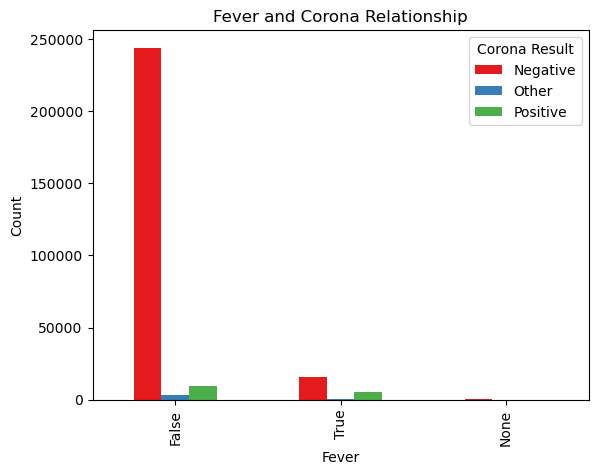

In [24]:
# Create a cross-tabulation between 'Fever' and 'Corona'
cross_table = pd.crosstab(corona['Fever'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Fever and Corona Relationship')
plt.xlabel('Fever')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

1. Count and Frequency Distribution:
- The majority of individuals in the dataset (92.11%) do not exhibit fever symptoms ('Fever: False').
- A smaller portion (7.80%) show symptoms of fever ('Fever: True').
- A very small percentage (0.09%) has an undefined or missing value for fever symptoms ('Fever: None').

2. Correlation with Corona Test Results:
- Among those without fever symptoms (False), the majority tested negative for Corona.This indicates that the absence of fever symptoms is generally associated with a negative test result for COVID-19.
- Individuals with fever symptoms (True) show a mix of negative and positive test results, with a higher count of negative results.The higher count of negative results among those with fever symptoms might suggest that fever alone may not be a strong indicator of a positive test.
- The 'None' category has an insignificant count but indicates missing or undefined data.

# 2.1.4. Sore Throat

In [25]:
column_summary(corona,'Sore_throat')

Column Name: Sore_throat
**************************************************
Description (Categorical):
        Count  Frequency (%)
False  276921      99.308943
True     1926       0.690699
None        1       0.000359
**************************************************
Object Type:
object
**************************************************


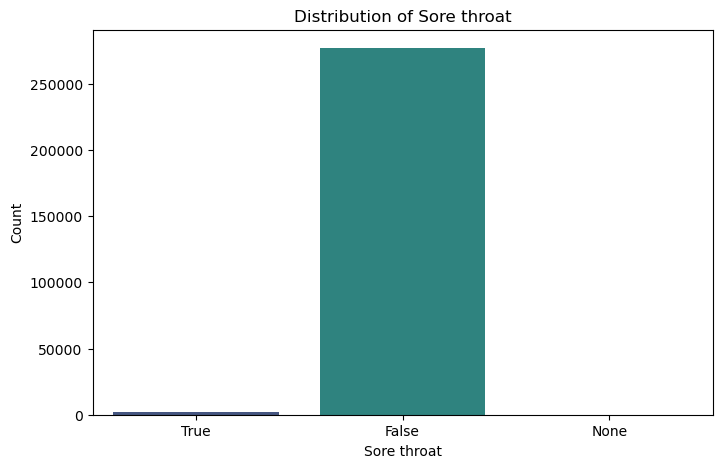

In [26]:
# Plotting the distribution of 'Sore throat'
plt.figure(figsize=(8, 5))
sns.countplot(x='Sore_throat', data=corona, palette='viridis')
plt.title('Distribution of Sore throat')
plt.xlabel('Sore throat')
plt.ylabel('Count')
plt.show()

- Bivariate Analysis with target variable

Corona       negative  other  positive
Sore_throat                           
False          259861   3858     13202
True              366     34      1526
None                0      0         1


<Figure size 800x600 with 0 Axes>

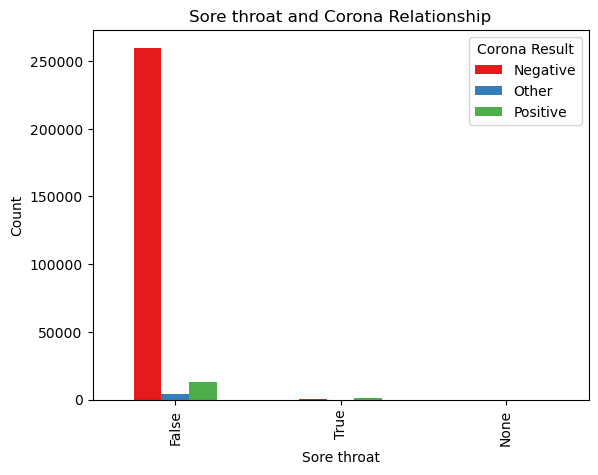

In [27]:
# Create a cross-tabulation between 'Sore_throat' and 'Corona'
cross_table = pd.crosstab(corona['Sore_throat'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Sore throat and Corona Relationship')
plt.xlabel('Sore throat')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

1. Count and Frequency Distribution:
- The majority of individuals in the dataset (99.31%) do not exhibit sore throat symptoms ('Sore_throat: False').
- A very small portion (0.69%) show symptoms of sore throat ('Sore_throat: True').
- There's an extremely low count (0.00036%) with an undefined or missing value for sore throat symptoms ('Sore_throat: None').

2. Correlation with Corona Test Results:

- Among those without sore throat symptoms (False), the majority tested negative for Corona.This suggests that the absence of sore throat symptoms is generally associated with a negative test result for COVID-19.
- Individuals with sore throat symptoms (True) show a mix of negative and positive test results, with a higher count of negative results.The higher count of negative results among those with sore throat symptoms might indicate that sore throat alone may not be a strong indicator of a positive test.
- The 'None' category has an insignificant count but indicates missing or undefined data.

# 2.1.5. Shortness of breath 

In [28]:
column_summary(corona,'Shortness_of_breath')

Column Name: Shortness_of_breath
**************************************************
Description (Categorical):
        Count  Frequency (%)
False  277270      99.434100
True     1577       0.565541
None        1       0.000359
**************************************************
Object Type:
object
**************************************************


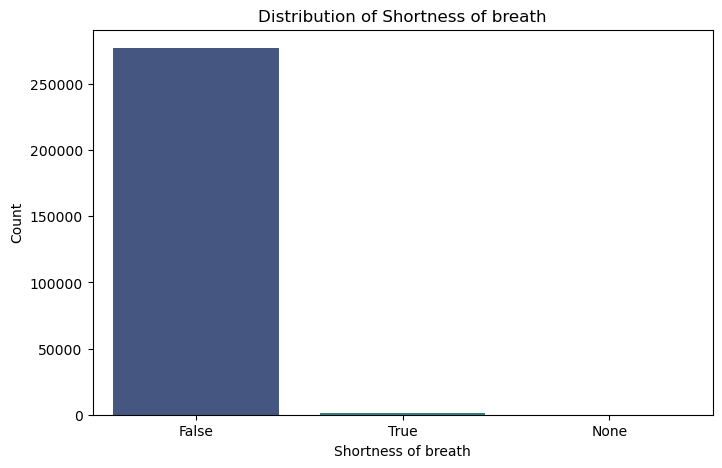

In [29]:
# Plotting the distribution of 'Shortness_of_breath'
plt.figure(figsize=(8, 5))
sns.countplot(x='Shortness_of_breath', data=corona, palette='viridis')
plt.title('Distribution of Shortness of breath')
plt.xlabel('Shortness of breath')
plt.ylabel('Count')
plt.show()

- Bivariate analysis with the target variable

Corona               negative  other  positive
Shortness_of_breath                           
False                  259842   3864     13564
True                      385     28      1164
None                        0      0         1


<Figure size 800x600 with 0 Axes>

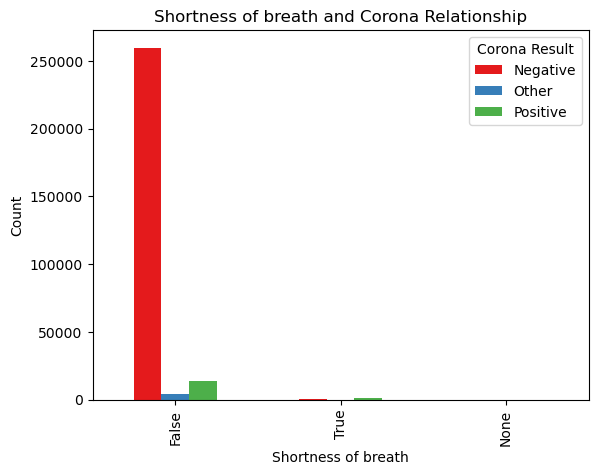

In [30]:
# Create a cross-tabulation between 'Shortness_of_breath' and 'Corona'
cross_table = pd.crosstab(corona['Shortness_of_breath'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Shortness of breath and Corona Relationship')
plt.xlabel('Shortness of breath')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

1. Count and Frequency Distribution:

- The majority of individuals in the dataset (99.43%) do not exhibit shortness of breath symptoms ('Shortness_of_breath: False').
- A small portion (0.57%) show symptoms of shortness of breath ('Shortness_of_breath: True').
- There's an extremely low count (0.00036%) with an undefined or missing value for shortness of breath symptoms ('Shortness_of_breath: None').

2. Correlation with Corona Test Results:

- Among those without shortness of breath symptoms (False), the majority tested negative for Corona.This suggests that the absence of shortness of breath symptoms is generally associated with a negative test result for COVID-19.
- Individuals with shortness of breath symptoms (Shortness_of_breath: True) have a higher count of positive results (1,164) than negative results (385).This indicates that shortness of breath symptoms may be associated with a higher likelihood of testing positive for COVID-19.
- The 'None' category has an insignificant count but indicates missing or undefined data.

# 2.1.6. Headache

In [31]:
column_summary(corona,'Headache')

Column Name: Headache
**************************************************
Description (Categorical):
        Count  Frequency (%)
False  276433      99.133937
True     2414       0.865705
None        1       0.000359
**************************************************
Object Type:
object
**************************************************


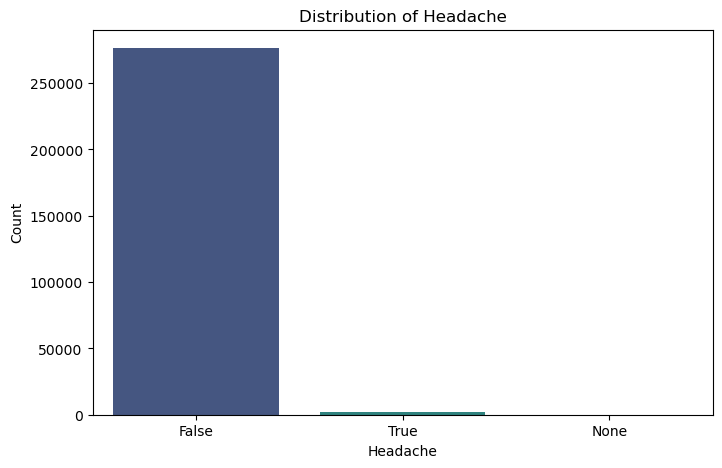

In [32]:
# Plotting the distribution of 'Headache'
plt.figure(figsize=(8, 5))
sns.countplot(x='Headache', data=corona, palette='viridis')
plt.title('Distribution of Headache')
plt.xlabel('Headache')
plt.ylabel('Count')
plt.show()

- Bivariate analysis with target variable

Corona    negative  other  positive
Headache                           
False       260079   3861     12493
True           148     31      2235
None             0      0         1


<Figure size 800x600 with 0 Axes>

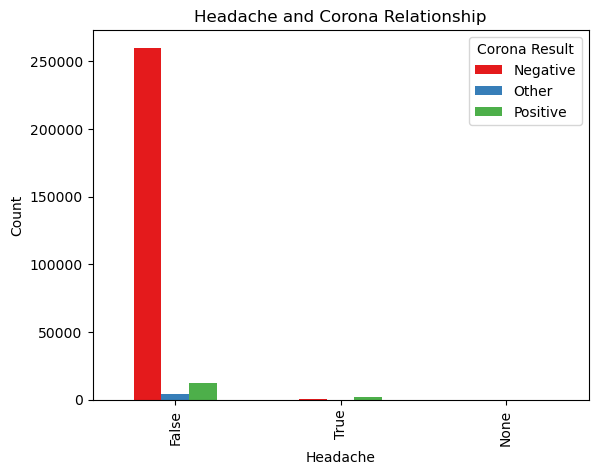

In [33]:
# Create a cross-tabulation between 'Headache' and 'Corona'
cross_table = pd.crosstab(corona['Headache'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Headache and Corona Relationship')
plt.xlabel('Headache')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

1. Count and Frequency Distribution:
- The majority of individuals in the dataset (99.13%) do not exhibit headache symptoms ('Headache: False').
- A small portion (0.87%) show symptoms of headache ('Headache: True').
- There is a very small percentage (0.0004%) with an undefined or missing value for headache symptoms ('Headache: None').

2. Correlation with Corona Test Results:
- Among those without headache symptoms (False), the majority tested negative for Corona.This suggests that the absence of headache symptoms is strongly associated with a negative test result for COVID-19.
- Individuals with headache symptoms (True) show a mix of negative and positive test results, with a higher count of positive results.This indicates that the presence of headache symptoms may be associated with a higher likelihood of testing positive for COVID-19.
- The 'None' category has an insignificant count but indicates missing or undefined data.

# 2.1.7. Age_60_Above

In [34]:
column_summary(corona,'Age_60_above')

Column Name: Age_60_above
**************************************************
Description (Categorical):
       Count  Frequency (%)
None  127320      45.659284
No    125703      45.079398
Yes    25825       9.261318
**************************************************
Object Type:
object
**************************************************


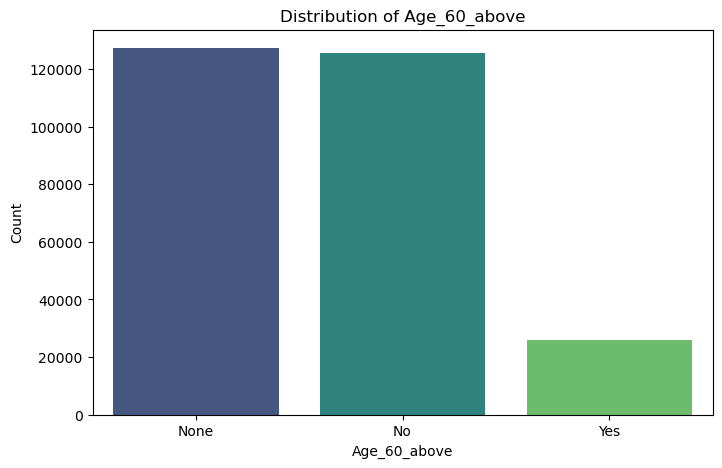

In [35]:
# Plotting the distribution of 'Age_60_above'
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_60_above', data=corona, palette='viridis')
plt.title('Distribution of Age_60_above')
plt.xlabel('Age_60_above')
plt.ylabel('Count')
plt.show()

- Bivariate analysis with target variable

Corona        negative  other  positive
Age_60_above                           
No              114602   1836      9265
None            122404   1656      3260
Yes              23221    400      2204


<Figure size 800x600 with 0 Axes>

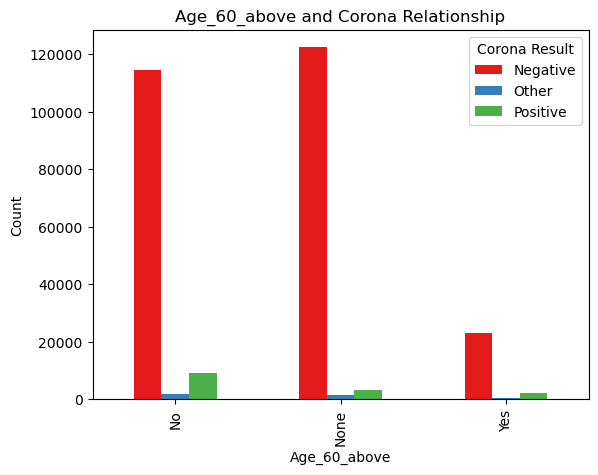

In [36]:
# Create a cross-tabulation between 'Age_60_above' and 'Corona'
cross_table = pd.crosstab(corona['Age_60_above'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Age_60_above and Corona Relationship')
plt.xlabel('Age_60_above')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

1. Count and Frequency Distribution:
- The majority of individuals in the dataset (45.66%) have an undefined or missing value for the 'Age_60_above' category.
- A significant portion (45.08%) of individuals are in the 'No' category, indicating they are not 60 years old or above.
- A smaller percentage (9.26%) falls into the 'Yes' category, indicating they are 60 years old or above.

2. Correlation with Corona Test Results:
- Among those in the 'No' category (not 60 years old or above), the majority tested negative for Corona.
- Individuals with an undefined or missing value for 'Age_60_above' (None) show a mix of negative and positive test results.
- Among those in the 'Yes' category (60 years old or above), there is a mix of negative and positive test results, with a higher count of positive results.

# 2.1.8. Sex 

In [37]:
column_summary(corona,'Sex')

Column Name: Sex
**************************************************
Description (Categorical):
         Count  Frequency (%)
female  130158      46.677043
male    129127      46.307307
None     19563       7.015650
**************************************************
Object Type:
object
**************************************************


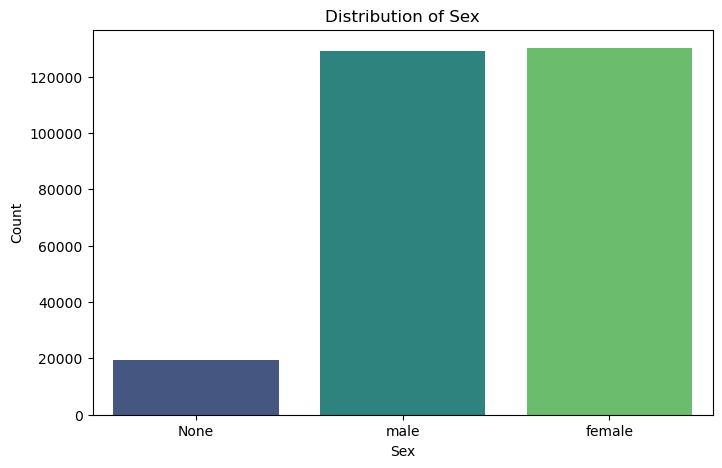

In [38]:
# Plotting the distribution of 'Sex'
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=corona, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

- Bivariate Analysis with target variable

Corona  negative  other  positive
Sex                              
None       17876    518      1169
female    122500   1617      6041
male      119851   1757      7519


<Figure size 800x600 with 0 Axes>

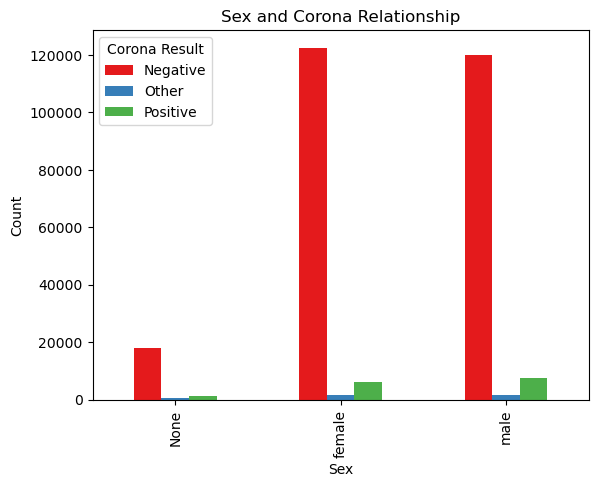

In [39]:
# Create a cross-tabulation between 'Sex' and 'Corona'
cross_table = pd.crosstab(corona['Sex'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Sex and Corona Relationship')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()

1. Count and Frequency Distribution:
- The dataset contains information on gender, with the majority being females (46.68%).
- A significant portion of the dataset is males (46.31%).
- A smaller percentage has an undefined or missing value for gender (7.02%).

2. Correlation with Corona Test Results:
- Among females, the majority tested negative for Corona.
- Among males, there is a mix of negative and positive test results, with a slightly higher count of positive results.
- Individuals with an undefined or missing value for gender (None) show a mix of negative and positive test results.

# 2.1.9. Known contact 

In [40]:
column_summary(corona,'Known_contact')

Column Name: Known_contact
**************************************************
Description (Categorical):
                         Count  Frequency (%)
Other                   242741      87.051368
Abroad                   25468       9.133291
Contact with confirmed   10639       3.815340
**************************************************
Object Type:
object
**************************************************


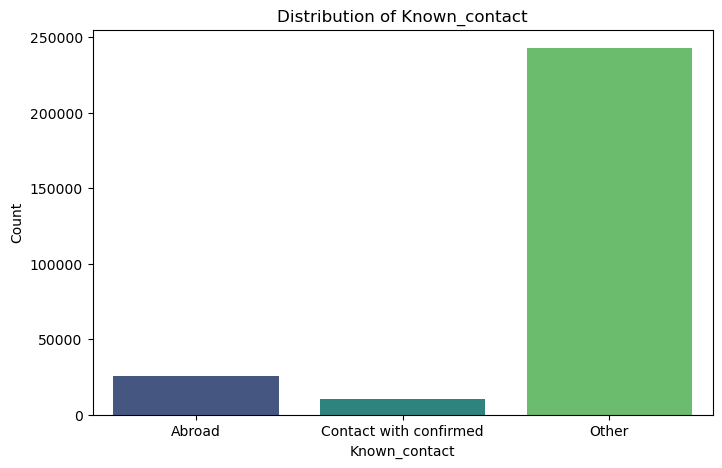

In [41]:
# Plotting the distribution of 'Known_contact'
plt.figure(figsize=(8, 5))
sns.countplot(x='Known_contact', data=corona, palette='viridis')
plt.title('Distribution of Known_contact')
plt.xlabel('Known_contact')
plt.ylabel('Count')
plt.show()

- Bivariate Analysis with the target variable

Corona                  negative  other  positive
Known_contact                                    
Abroad                     23205    394      1869
Contact with confirmed      3160    161      7318
Other                     233862   3337      5542


<Figure size 800x600 with 0 Axes>

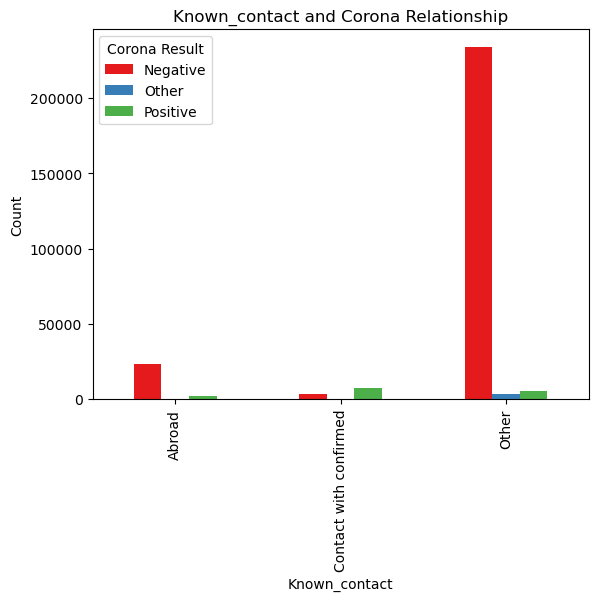

In [42]:
# Create a cross-tabulation between 'Known_contact' and 'Corona'
cross_table = pd.crosstab(corona['Known_contact'], corona['Corona'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Known_contact and Corona Relationship')
plt.xlabel('Known_contact')
plt.ylabel('Count')
plt.legend(title='Corona Result', labels=['Negative', 'Other', 'Positive'])

# Show the plot
plt.show()



1. Distribution of Known Contact Types:
- The majority of individuals (87.05%) in the dataset have a known contact category labeled as 'Other.'
- A smaller percentage of individuals (9.13%) have a known contact category labeled as 'Abroad.'
- A relatively small portion of individuals (3.82%) report a known contact category labeled as 'Contact with confirmed.'

2. Correlation with Corona Test Results:
- Among those with a known contact labeled as 'Other,' the majority tested negative for Corona. This may indicate that individuals with contacts categorized as 'Other' have a lower likelihood of testing positive.
- Individuals with a known contact labeled as 'Abroad' show a mix of negative and positive test results, with a higher count of negative results.This implies that individuals with international exposure (Abroad) may have a higher likelihood of testing negative.
- For individuals reporting 'Contact with confirmed,' the count of positive results is higher than negative results.This is a notable observation, suggesting that direct contact with confirmed cases increases the risk of testing positive.

# 2.1.10. Corona (target variable)

In [43]:
column_summary(corona,'Corona')

Column Name: Corona
**************************************************
Description (Categorical):
           Count  Frequency (%)
negative  260227      93.322168
positive   14729       5.282089
other       3892       1.395742
**************************************************
Object Type:
object
**************************************************


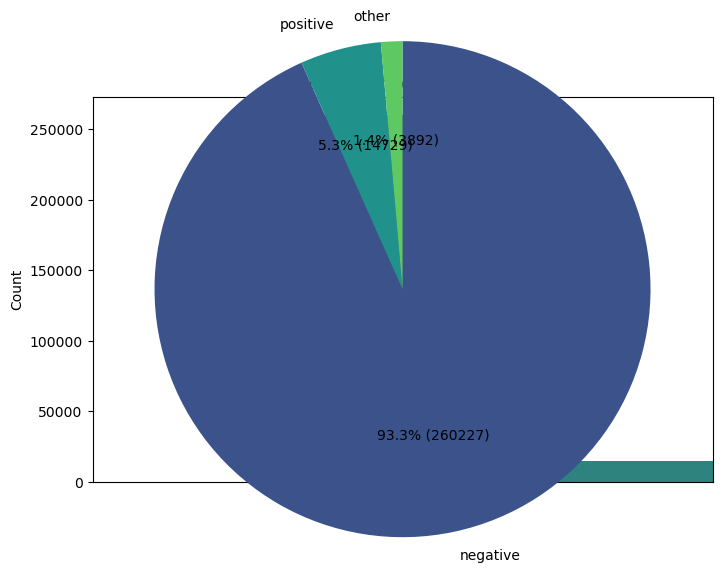

In [44]:
# Plotting the distribution of 'Corona'
plt.figure(figsize=(8, 5))
sns.countplot(x='Corona', data=corona, palette='viridis')
plt.title('Distribution of Covid result')
plt.xlabel('Covid Result')
plt.ylabel('Count')

# Convert countplot to a pie plot
total_count = len(corona['Corona'])
ax2 = plt.gca().twinx()
ax2.pie(corona['Corona'].value_counts(), labels=corona['Corona'].value_counts().index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * total_count / 100), startangle=90, counterclock=False, colors=sns.color_palette('viridis', n_colors=3))
ax2.set_ylabel('')

plt.show()


- Interpretation

1. Distribution:
- The 'Corona' column has three categories: 'negative', 'positive', and 'other'.
- The majority of the entries fall into the 'negative' category, with 93.32% of the total count.'positive' entries represent 5.28% of the total count.'other' entries have a frequency of 1.40%.

2. Imbalance:
- The data is highly imbalanced, with a significant majority of entries indicating a 'negative' result. This suggests that the dataset is skewed towards negative cases.

3. Actionable Insights:
- The high frequency of 'negative' results indicates a prevalence of non-COVID cases in the dataset.
- Depending on the analysis or task at hand, it's important to be aware of this imbalance and consider appropriate strategies, such as using balanced datasets or adjusting modeling techniques to address potential biases

# 2.2. Bivariate and Multivariate Analysis

# 2.2.1. Bivariate Analysis between symptoms and test results 

In [45]:
import plotly.express as px

# Countplot for Cough_symptoms
fig1 = px.histogram(corona, x='Cough_symptoms', title='Cough Symptoms')

# Countplot for Fever
fig2 = px.histogram(corona, x='Fever', title='Fever')

# Countplot for Shortness_of_breath
fig3 = px.histogram(corona, x='Shortness_of_breath', title='Shortness of Breath')

# Countplot for Headache
fig4 = px.histogram(corona, x='Headache', title='Headache')

# Countplot for Sore_throat
fig5 = px.histogram(corona, x='Sore_throat', title='Sore Throat')

# Countplot for Corona
fig6 = px.histogram(corona, x='Corona', title='Corona Test Result')

# Cross-tabulation for relationships between symptoms and Corona test result
symptoms_columns = ['Cough_symptoms', 'Fever', 'Shortness_of_breath', 'Headache', 'Sore_throat']

for symptom in symptoms_columns:
    cross_tab = pd.crosstab(corona[symptom], corona['Corona'], margins=True, margins_name='Total', normalize='index')
    fig = px.bar(cross_tab, barmode='stack')
    fig.update_layout(title=f'{symptom} vs. Corona', xaxis_title=symptom, yaxis_title='Proportion')
    fig.show()
    print(cross_tab)

Corona          negative     other  positive
Cough_symptoms                              
False           0.951994  0.013686  0.034319
True            0.828526  0.015558  0.155916
None            0.869048  0.000000  0.130952
Total           0.933222  0.013957  0.052821


Corona  negative     other  positive
Fever                               
False   0.950741  0.013685  0.035574
True    0.727106  0.017332  0.255563
None    0.869048  0.000000  0.130952
Total   0.933222  0.013957  0.052821


Corona               negative     other  positive
Shortness_of_breath                              
False                0.937144  0.013936  0.048920
True                 0.244134  0.017755  0.738110
None                 0.000000  0.000000  1.000000
Total                0.933222  0.013957  0.052821


Corona    negative     other  positive
Headache                              
False     0.940839  0.013967  0.045194
True      0.061309  0.012842  0.925849
None      0.000000  0.000000  1.000000
Total     0.933222  0.013957  0.052821


Corona       negative     other  positive
Sore_throat                              
False        0.938394  0.013932  0.047674
True         0.190031  0.017653  0.792316
None         0.000000  0.000000  1.000000
Total        0.933222  0.013957  0.052821


# 2.2.2 Impact of COVID-19 Symptoms and Known Contact on Corona Test Results

In [46]:
# Variables to analyze
symptoms_columns = ['Cough_symptoms', 'Fever', 'Shortness_of_breath', 'Headache', 'Sore_throat']
known_contact_column = 'Known_contact'
corona_column = 'Corona'

# Loop through symptoms and create cross-tabulations
for symptom in symptoms_columns:
    cross_tab = pd.crosstab([corona[symptom], corona[known_contact_column]], corona[corona_column], margins=True, margins_name='Total', normalize='index')
    cross_tab.reset_index(inplace=True)

    # Plotting a grouped bar chart using Plotly Express
    fig = px.bar(cross_tab, x=symptom, y='positive', color=known_contact_column, barmode='group', text='positive',
                 labels={'positive': 'Positive', 'negative': 'Negative', 'Total': 'Total'},
                 title=f'{symptom} vs. {corona_column} by {known_contact_column}',
                 color_discrete_map={'negative': 'blue', 'Total': 'gray', 'positive': 'red'})

    # Customizing the plot
    fig.update_layout(xaxis_title=symptom, yaxis_title='Proportion', legend_title=known_contact_column, uniformtext_minsize=8,
                      uniformtext_mode='hide', barmode='group')

    # Show percentage values on top of the bars
    fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

    fig.show()

    # Display the cross-tabulation
    print(cross_tab)

Corona Cough_symptoms           Known_contact  negative     other  positive
0               False                  Abroad  0.859944  0.016059  0.123996
1               False  Contact with confirmed  0.210666  0.016132  0.773202
2               False                   Other  0.972038  0.013560  0.014402
3                True                  Abroad  0.928737  0.015274  0.055989
4                True  Contact with confirmed  0.382347  0.014182  0.603471
5                True                   Other  0.855841  0.016272  0.127887
6                None                  Abroad  0.500000  0.000000  0.500000
7                None  Contact with confirmed  0.090909  0.000000  0.909091
8                None                   Other  0.914894  0.000000  0.085106
9               Total                          0.933222  0.013957  0.052821


Corona  Fever           Known_contact  negative     other  positive
0       False                  Abroad  0.924290  0.014118  0.061592
1       False  Contact with confirmed  0.329731  0.014131  0.656137
2       False                   Other  0.971942  0.013640  0.014418
3        True                  Abroad  0.884924  0.018195  0.096881
4        True  Contact with confirmed  0.228446  0.017302  0.754252
5        True                   Other  0.764021  0.016603  0.219376
6        None                  Abroad  0.600000  0.000000  0.400000
7        None  Contact with confirmed  0.090909  0.000000  0.909091
8        None                   Other  0.911017  0.000000  0.088983
9       Total                          0.933222  0.013957  0.052821


Corona Shortness_of_breath           Known_contact  negative     other  \
0                    False                  Abroad  0.918099  0.015593   
1                    False  Contact with confirmed  0.307132  0.014963   
2                    False                   Other  0.965209  0.013721   
3                     True                  Abroad  0.378049  0.006098   
4                     True  Contact with confirmed  0.131922  0.017915   
5                     True                   Other  0.283465  0.023622   
6                     None                   Other  0.000000  0.000000   
7                    Total                          0.933222  0.013957   

Corona  positive  
0       0.066309  
1       0.677905  
2       0.021069  
3       0.615854  
4       0.850163  
5       0.692913  
6       1.000000  
7       0.052821  


Corona Headache           Known_contact  negative     other  positive
0         False                  Abroad  0.922660  0.015611  0.061728
1         False  Contact with confirmed  0.328377  0.015293  0.656330
2         False                   Other  0.966566  0.013745  0.019689
3          True                  Abroad  0.103352  0.005587  0.891061
4          True  Contact with confirmed  0.055601  0.013900  0.930499
5          True                   Other  0.051621  0.014406  0.933974
6          None                   Other  0.000000  0.000000  1.000000
7         Total                          0.933222  0.013957  0.052821


Corona Sore_throat           Known_contact  negative     other  positive
0            False                  Abroad  0.919069  0.015548  0.065383
1            False  Contact with confirmed  0.314496  0.014947  0.670557
2            False                   Other  0.965572  0.013723  0.020705
3             True                  Abroad  0.394805  0.010390  0.594805
4             True  Contact with confirmed  0.101033  0.017222  0.881745
5             True                   Other  0.188060  0.022388  0.789552
6             None                   Other  0.000000  0.000000  1.000000
7            Total                          0.933222  0.013957  0.052821


- Interpretation 

1. Cough Symptoms:
- Highest Positive Probability: Contact with confirmed cases has the highest probability of a positive result (0.773202).
- Negative Probability: Abroad contact has the highest probability of a negative result (0.859944).
- Other Probability: Other contacts show a low probability of being in the "other" category (0.014402).

2. Fever:
- Highest Positive Probability: Contact with confirmed cases has the highest probability of a positive result (0.754252).
- Negative Probability: Abroad contact has the highest probability of a negative result (0.924290).
- Other Probability: Other contacts show a low probability of being in the "other" category (0.014418).

3. Shortness of Breath:
- Highest Positive Probability: Contact with confirmed cases has the highest probability of a positive result (0.850163).
- Negative Probability: Abroad contact has the highest probability of a negative result (0.918099).
- Other Probability: Other contacts show a low probability of being in the "other" category (0.013721).

4. Headache:
- Highest Positive Probability: Contact with confirmed cases has the highest probability of a positive result (0.930499).
- Negative Probability: Abroad contact has the highest probability of a negative result (0.922660).
- Other Probability: Other contacts show a low probability of being in the "other" category (0.019689).

5. Sore Throat:
- Highest Positive Probability: Contact with confirmed cases has the highest probability of a positive result (0.881745).
- Negative Probability: Abroad contact has the highest probability of a negative result (0.919069).
- Other Probability: Other contacts show a low probability of being in the "other" category (0.020705).

6. General Observations:
- Total Probabilities: Across all symptoms, the total probabilities for negative, positive, and other seem consistent, indicating a balanced distribution of outcomes.
- None Category: The "None" category for known contact tends to have an equal probability of being negative or positive, suggesting uncertainty when there's no known contact.



# 2.2.3. Covid result based on cough symptoms and fever

In [47]:
#Cross table 
cross_table_multivariate = pd.crosstab([corona['Fever'], corona['Cough_symptoms']], corona['Corona'], margins=True, margins_name='Total', normalize='index')

# Resetting the index
cross_table_multivariate.reset_index(inplace=True)
print(cross_table_multivariate)
# Plotting a grouped bar chart using Plotly Express
fig = px.bar(cross_table_multivariate, 
             x='Fever', 
             y='Cough_symptoms', 
             color='positive',
             text='positive',  # Display the percentage values on bars
             labels={'positive': 'Positive', 'negative': 'Negative', 'other': 'Other'},
             title='Percentage of Positive Corona Outcomes Based on Cough and Fever Symptoms',
             color_discrete_map={'negative': 'blue', 'other': 'gray', 'positive': 'red'},
             height=600)

# Customizing the plot
fig.update_layout(xaxis_title='Fever Symptoms', 
                  yaxis_title='Cough Symptoms', 
                  legend_title='Corona Result',
                  uniformtext_minsize=8,  # Set minimum text size for better readability
                  uniformtext_mode='hide')  # Hide text if it doesn't fit in the bar

# Show percentage values on top of the bars
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

fig.show()

Corona  Fever Cough_symptoms  negative     other  positive
0       False          False  0.959851  0.013612  0.026537
1       False           True  0.872416  0.014317  0.113267
2       False           None  0.000000  0.000000  1.000000
3        True          False  0.663958  0.016412  0.319630
4        True           True  0.752763  0.017706  0.229532
5        True           None  0.000000  0.000000  1.000000
6        None           True  0.000000  0.000000  1.000000
7        None           None  0.876000  0.000000  0.124000
8       Total                 0.933222  0.013957  0.052821


- Interpretation 

1. High Probability of Negative Results Without Fever and Cough:

- Rows where both Fever and Cough symptoms are False (No Fever and No Cough) show a high probability of a negative result (95.99%). This suggests that individuals without Fever and Cough symptoms are more likely to test negative for COVID-19.

2. Positive Results More Likely with Fever:
- Rows where Fever is True show a higher probability of positive results compared to when Fever is False. For instance, when Fever is True and Cough is False, the probability of a positive result is 31.96%. This implies that the presence of Fever might be associated with an increased likelihood of testing positive.

3. Higher Positive Probability with Cough Symptoms:
- Rows where Cough symptoms are True (regardless of Fever) generally show a higher probability of positive results. For instance, when Cough is True and Fever is False, the probability of a positive result is 11.33%. This suggests that the presence of Cough symptoms might be associated with an increased likelihood of testing positive.

4. High Positive Probability When Information on Symptoms is Absent:
- Rows where information on symptoms is None (both Fever and Cough are None) show a 100% probability of a positive result. This indicates that when there is no information on Fever and Cough symptoms, the test outcome tends to be positive. It's crucial to understand the context behind these cases, as it could be related to certain testing or reporting practices.

5. Overall Test Outcome Distribution:
- The overall distribution of test outcomes across all scenarios is provided in the "Total" column. This gives a comprehensive view of the proportion of negative, other, and positive results in the entire dataset

# 2.2.4. Covid result by Age_60_above and Sex 

In [48]:
#Cross Table 
cross_table_multivariate = pd.crosstab([corona['Sex'], corona['Age_60_above']], corona['Corona'], margins=True, margins_name='Total', normalize='index')

# Resetting the index
cross_table_multivariate.reset_index(inplace=True)
print(cross_table_multivariate)
# Plotting a grouped bar chart using Plotly Express
fig = px.bar(cross_table_multivariate, 
             x='Sex', 
             y='Age_60_above', 
             color='positive',
             text='positive',  # Display the percentage values on bars
             labels={'positive': 'Positive', 'negative': 'Negative', 'other': 'Other'},
             title='Percentage of Positive Corona Outcomes Based on Cough and Fever Symptoms',
             color_discrete_map={'negative': 'blue', 'other': 'gray', 'positive': 'red'},
             height=600)

# Customizing the plot
fig.update_layout(xaxis_title='Sex', 
                  yaxis_title='Age_60_above', 
                  legend_title='Corona Result',
                  uniformtext_minsize=8,  # Set minimum text size for better readability
                  uniformtext_mode='hide')  # Hide text if it doesn't fit in the bar

# Show percentage values on top of the bars
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

fig.show()

Corona     Sex Age_60_above  negative     other  positive
0         None           No  0.911703  0.029520  0.058777
1         None         None  0.920310  0.024806  0.054884
2         None          Yes  0.902770  0.012375  0.084856
3       female           No  0.920195  0.012934  0.066871
4       female         None  0.966123  0.011088  0.022789
5       female          Yes  0.911130  0.016668  0.072202
6         male           No  0.903694  0.013288  0.083018
7         male         None  0.960907  0.013733  0.025360
8         male          Yes  0.885021  0.014616  0.100363
9        Total               0.933222  0.013957  0.052821


- Interpretation

1. Age and Gender:
- Female Population:
  Females tend to have higher probabilities of a negative result (0.966123) compared to males and the overall average.
  The probability of a positive result is relatively lower for females (0.022789).
- Male Population:
  Males show a slightly lower probability of a negative result (0.960907) compared to females but still higher than the overall average.The probability of a positive result is higher for males (0.025360) compared to females.

2. Age Group and Gender:
- Age 60 and Above:
  Individuals aged 60 and above have a higher probability of a negative result (0.911703) compared to other age groups.
  The probability of a positive result is relatively lower for individuals aged 60 and above (0.058777).
- None Category (Missing Data):
   Entries where the sex or age information is missing ("None" category) show relatively high probabilities of negative results (0.920310). This suggests that missing demographic information is associated with a higher likelihood of a negative outcome.

3. Age and COVID-19 Result:
- Individuals aged 60 and above show a consistent trend of higher probabilities for a negative result, which is expected given the higher vulnerability of older age groups to severe outcomes.

4. Gender and COVID-19 Result:
- Females, in general, tend to have higher probabilities of a negative result compared to males.

5. Overall:
- The total probabilities for negative, positive, and other seem consistent across different demographic categories, indicating a balanced distribution of outcomes.

# 2.2.5. Covid result by Sore throat and Shortness of breath

In [49]:
#Cross Table 
cross_table_multivariate = pd.crosstab([corona['Sore_throat'], corona['Shortness_of_breath']], corona['Corona'], margins=True, margins_name='Total', normalize='index')

# Resetting the index
cross_table_multivariate.reset_index(inplace=True)
print(cross_table_multivariate)
# Plotting a grouped bar chart using Plotly Express
fig = px.bar(cross_table_multivariate, 
             x='Sore_throat', 
             y='Shortness_of_breath', 
             color='positive',
             text='positive',  # Display the percentage values on bars
             labels={'positive': 'Positive', 'negative': 'Negative', 'other': 'Other'},
             title='Percentage of Positive Corona Outcomes Based on Cough and Fever Symptoms',
             color_discrete_map={'negative': 'blue', 'other': 'gray', 'positive': 'red'},
             height=600)

# Customizing the plot
fig.update_layout(xaxis_title='Sore_throat', 
                  yaxis_title='Shortness_of_breath', 
                  legend_title='Corona Result',
                  uniformtext_minsize=8,  # Set minimum text size for better readability
                  uniformtext_mode='hide')  # Hide text if it doesn't fit in the bar

# Show percentage values on top of the bars
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

fig.show()

Corona Sore_throat Shortness_of_breath  negative     other  positive
0            False               False  0.941389  0.013925  0.044687
1            False                True  0.263889  0.015523  0.720588
2             True               False  0.193261  0.015893  0.790846
3             True                True  0.175637  0.025496  0.798867
4             None                None  0.000000  0.000000  1.000000
5            Total                      0.933222  0.013957  0.052821


# 3.1. Data Cleaning

# 3.1.1. Duplicate Values 

In [50]:
# Check for duplicate rows in the 'credit_card' DataFrame
duplicate_count = corona.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


# 3.1.2. Handling 'None' Values

In [51]:
# Count 'None' values in each column
none_values_count = corona.eq('None').sum()

# Display the count of 'None' values for each column
print("Number of 'None' values in each column:")
print(none_values_count)

Number of 'None' values in each column:
Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64


# Converting the 'None' values into null values 

In [52]:
import numpy as np

# Replace 'None' values with NaN
corona.replace('None', np.nan, inplace=True)

# Count 'NaN' values in each column after the replacement
nan_values_count = corona.isna().sum()

# Display the count of 'NaN' values for each column
print("Number of 'NaN' values in each column:")
print(nan_values_count)

Number of 'NaN' values in each column:
Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64


In [53]:
# Calculate the percentage of missing values for each column
missing_percentage = (corona.isna().sum() / len(corona)) * 100

# Display the percentage of missing values for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64


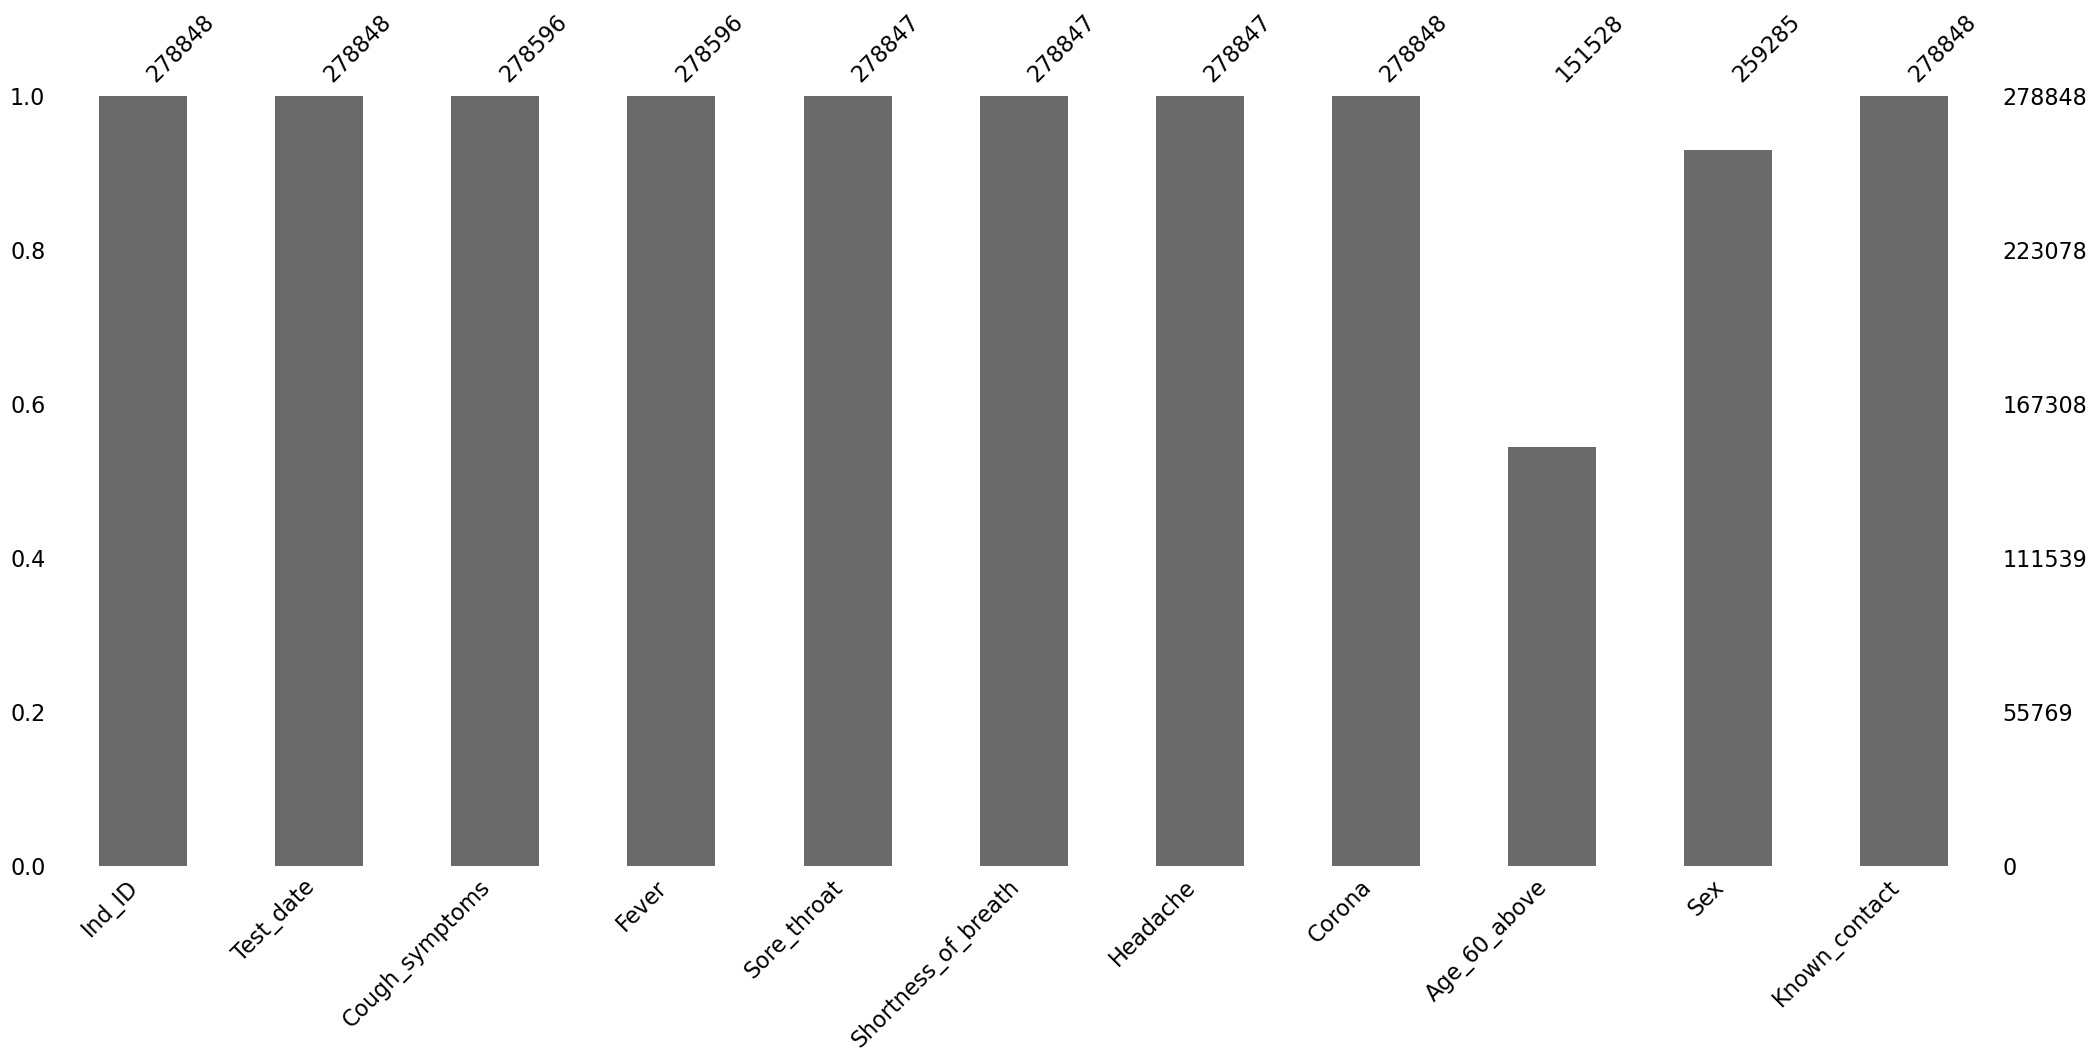

In [54]:
# Import the missingno library for missing data visualization
import missingno as msno

# Create a bar plot to visualize missing values in the 'credit_card' DataFrame
msno.bar(corona)

# Display the plot
plt.show()

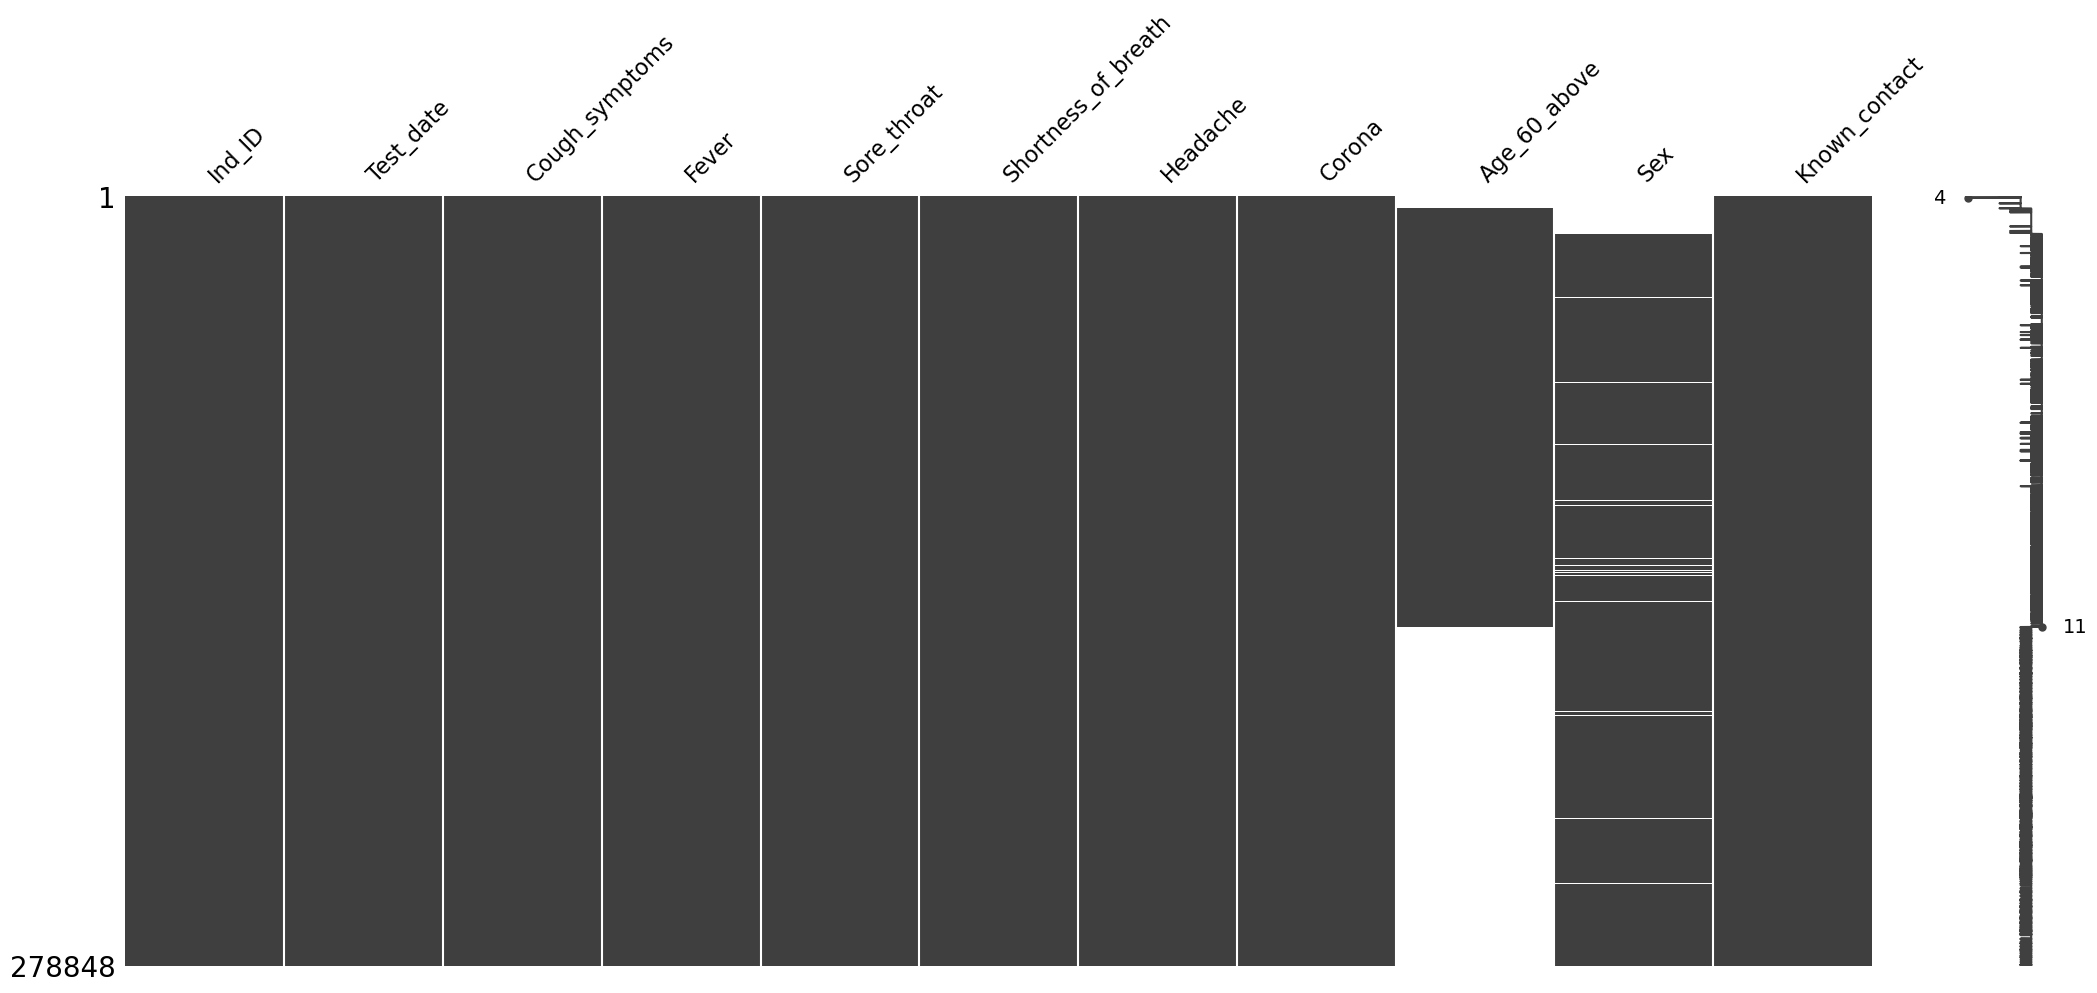

In [55]:
# Create a matrix plot to visualize missing values in the 'credit_card' DataFrame
msno.matrix(corona)

# Display the plot
plt.show()

<AxesSubplot:>

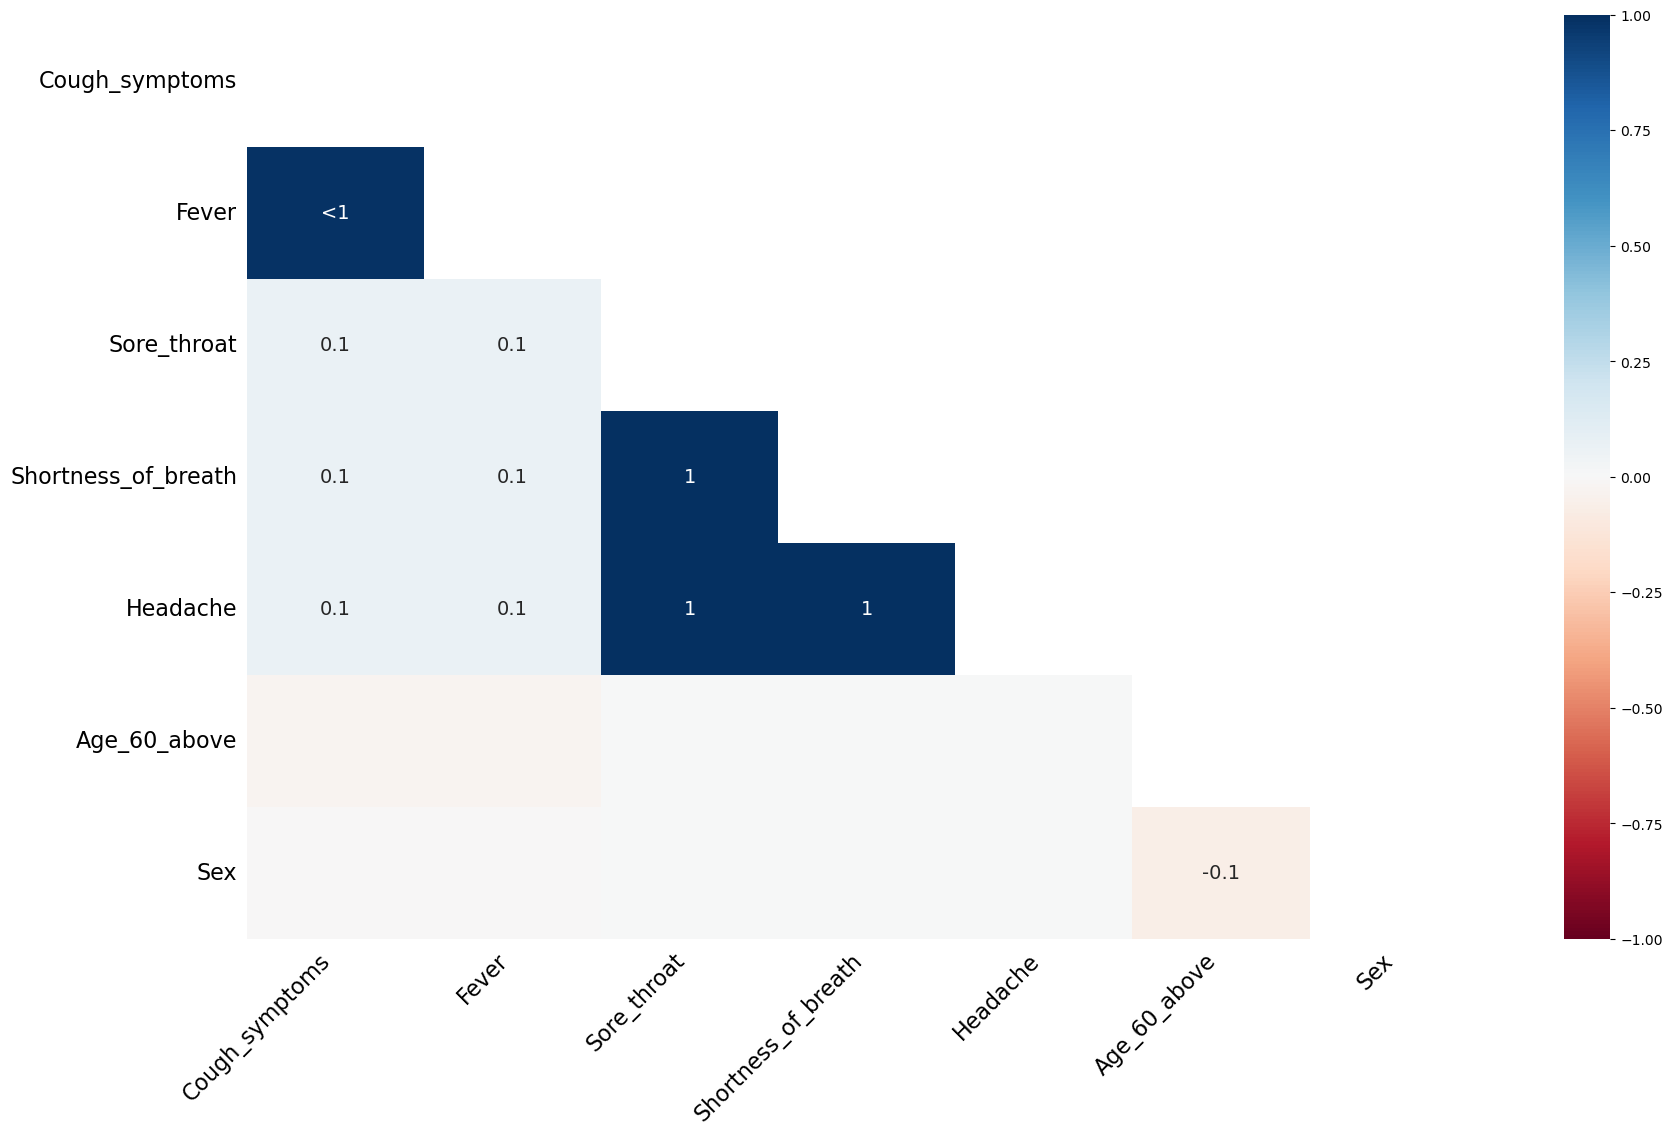

In [56]:
msno.heatmap(corona)

# 3.1.3. Dropping the null values 

In [57]:
# Drop rows with any null values
corona = corona.dropna()

# Display the cleaned DataFrame
corona

Ind_ID  Test_date Cough_symptoms  Fever Sore_throat  \
13727    13728 2020-03-22           True  False       False   
13728    13729 2020-03-22           True  False       False   
13730    13731 2020-03-22           True   True       False   
13731    13732 2020-03-22          False  False       False   
13732    13733 2020-03-22          False  False       False   
...        ...        ...            ...    ...         ...   
156035  156036 2020-04-14           True  False        True   
156036  156037 2020-04-14           True  False        True   
156037  156038 2020-04-14           True   True       False   
156038  156039 2020-04-14          False  False       False   
156039  156040 2020-04-14          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
13727                False    False  negative           No    male   
13728                False    False  negative           No  female   
13730                False    False  positive          Yes  female   
13731                False    False     other           No  female   
13732                False    False     other           No  female   
...                    ...      ...       ...          ...     ...   
156035               False    False  negative          Yes    male   
156036                True    False  negative           No    male   
156037               False    False  negative           No  female   
156038               False    False  negative           No    male   
156039               False    False  negative           No  female   

       Known_contact  
13727         Abroad  
13728         Abroad  
13730          Other  
13731          Other  
13732          Other  
...              ...  
156035        Abroad  
156036        Abroad  
156037        Abroad  
156038         Other  
156039         Other  

[138172 rows x 11 columns]

# 3.1.4. Dropping the 'Other' values from Corona column 

In [58]:
# Drop rows where 'Corona' is 'other'
corona = corona[corona['Corona'] != 'other']

# Display the filtered DataFrame
print(corona['Corona'].value_counts())

negative    125668
positive     10626
Name: Corona, dtype: int64


In [59]:
corona

Ind_ID  Test_date Cough_symptoms  Fever Sore_throat  \
13727    13728 2020-03-22           True  False       False   
13728    13729 2020-03-22           True  False       False   
13730    13731 2020-03-22           True   True       False   
13734    13735 2020-03-22          False  False       False   
13735    13736 2020-03-22          False  False       False   
...        ...        ...            ...    ...         ...   
156035  156036 2020-04-14           True  False        True   
156036  156037 2020-04-14           True  False        True   
156037  156038 2020-04-14           True   True       False   
156038  156039 2020-04-14          False  False       False   
156039  156040 2020-04-14          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
13727                False    False  negative           No    male   
13728                False    False  negative           No  female   
13730                False    False  positive          Yes  female   
13734                False    False  negative           No    male   
13735                False    False  negative           No  female   
...                    ...      ...       ...          ...     ...   
156035               False    False  negative          Yes    male   
156036                True    False  negative           No    male   
156037               False    False  negative           No  female   
156038               False    False  negative           No    male   
156039               False    False  negative           No  female   

       Known_contact  
13727         Abroad  
13728         Abroad  
13730          Other  
13734          Other  
13735          Other  
...              ...  
156035        Abroad  
156036        Abroad  
156037        Abroad  
156038         Other  
156039         Other  

[136294 rows x 11 columns]

In [61]:
corona.to_excel('corona_dataset.xlsx', index=False)

In [ ]:
covid19*sn

# 4. Feature Selection

# 4.1. Chi Square Test(Categorical variables with target variables)

In [ ]:
from scipy.stats import chi2_contingency

# List of categorical columns to test
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Create an empty list to store the chi-squared test results
chi_squared_results = []

# Perform chi-squared test for each categorical feature
for feature in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(corona[feature], corona['Corona'])
    
    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Determine significance
    significant = 'Yes' if p < 0.05 else 'No'
    
    # Append results to the list
    chi_squared_results.append({'Feature': feature, 'Chi-Square': chi2, 'P-Value': p, 'Significant': significant})

# Create a DataFrame from the results
chi_squared_results_df = pd.DataFrame(chi_squared_results)

# Print the results
print(chi_squared_results_df)

1. Cough_symptoms:
- Presence or absence of cough symptoms significantly relates to COVID-19 status.

2. Fever:
- Presence or absence of fever significantly relates to COVID-19 status.

3. Sore_throat:
- Presence or absence of a sore throat significantly relates to COVID-19 status.

4. Shortness_of_breath:
- Presence or absence of shortness of breath significantly relates to COVID-19 status.

5. Headache:
- Presence or absence of a headache significantly relates to COVID-19 status.

6. Age_60_above:
- Individuals above 60 have a significantly different likelihood of testing positive for COVID-19.

7. Sex:
- Gender significantly influences the probability of testing positive for COVID-19.

8. Known_contact:
- Having a known contact significantly relates to COVID-19 status.

# 5. Dropping Features 

In [ ]:
# List of columns to drop
columns_to_drop = ['Ind_ID', 'Test_date']

# Drop the specified columns
corona = corona.drop(columns=columns_to_drop)

In [ ]:
corona

# 6.Encoding

# 6.1. One Hot Encoding 

In [ ]:
# Columns to one-hot encode
columns_to_one_hot = ['Known_contact', 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex']

# One-hot encoding with drop_first=True
corona = pd.get_dummies(corona, columns=columns_to_one_hot, prefix=columns_to_one_hot, drop_first=True)

# Display the DataFrame after one-hot encoding
corona.head()


# 6.2. Label Encoding

# 6.2.1. Corona 

In [ ]:
# Column to label encode
column_to_label_encode = 'Corona'

# Label encoding
corona[column_to_label_encode] = corona[column_to_label_encode].map({'negative': 0, 'positive': 1})


# 6.2.2. Age 60 above 

In [ ]:
# Column to label encode
column_to_label_encode = 'Age_60_above'

# Label encoding
corona[column_to_label_encode] = corona[column_to_label_encode].map({'No': 0, 'Yes': 1})

# Display the DataFrame after label encoding
corona

# 7. Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'corona' is your DataFrame
X = corona.drop('Corona', axis=1)  # Features
y = corona['Corona']  # Target variable

# Perform the train-test split (adjust the test_size parameter as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# 8.Modelling

# 8.1.  Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the target labels on the testing data
y_pred = logistic_model.predict(X_test)

# Calculate training accuracy
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing data
accuracy = accuracy_score(y_test, y_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 8.2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a KNN classifier with a specified number of neighbors 
knn_classifier = KNeighborsClassifier(n_neighbors=11)

# Fit the KNN classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
ypred_test = knn_classifier.predict(X_test)
ypred_train = knn_classifier.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, ypred_train)
test_accuracy = accuracy_score(y_test, ypred_test)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, ypred_test)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, ypred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 8.2.1. Hyperparameter Tuning for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = { 'n_neighbors': list(range(1,31))}

# Create a grid search object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) with the best parameters
best_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# 8.3. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate training accuracy
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 8.3.1. SVM Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types to try
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best SVM model from the grid search
best_svm_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# You can now use 'best_svm_model' for predictions on your test data or further evaluation.

# 8.4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a Decision Tree classifier with the 'gini' criterion
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1)

# Fit the model to the training data
decision_tree_classifier.fit(X_train, y_train)

# Predict the target labels on the training data
y_train_pred = decision_tree_classifier.predict(X_train)

# Predict the target labels on the testing data
y_test_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 8.4.1 Hyperparameter Tuning for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=1)

param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,30))}

grid= GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Fit the Grid object to your training data
grid.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid.best_params_

# Get the best SVM model from the grid search
best_decision_tree_model = grid.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# 8.5. Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create a Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predict the target labels on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculate training accuracy (optional)
y_train_pred = gb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5)

# Generate a classification report (optional)
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix (optional)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 8.6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=1, n_estimators=35)

model.fit(X_train, y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, ypred_train)
test_accuracy = accuracy_score(y_test, ypred_test)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, ypred_test)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, ypred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 8.6.1. Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=1)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': list(range(1,100))}

# Create a grid search object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) with the best parameters
best_classifier = grid_search.best_estimator_


# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# 8.7.XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Calculate training accuracy
y_pred_train = model.predict(X_train)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

# Perform k-fold cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_test)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

# 9. Comparison Of the Models 

1. Logistic Regression:

- Training Accuracy: 95.21%
- Testing Accuracy: 95.38%
- Mean Cross-Validation Score: 95.21%

Classification Report:
- Precision: 80% for class 1, 96% for class 0
- Recall: 56% for class 1, 99% for class 0
- F1-Score: 66% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.38%


2. K-Nearest Neighbors (KNN):
- Training Accuracy: 95.65%
- Testing Accuracy: 95.82%
- Mean Cross-Validation Score: 95.56%

Classification Report:
- Precision: 83% for class 1, 97% for class 0
- Recall: 60% for class 1, 99% for class 0
- F1-Score: 70% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.82%


3. Support Vector Machine (SVM):
- Training Accuracy: 95.78%
- Testing Accuracy: 95.99%
- Mean Cross-Validation Score: 95.78%

Classification Report:
- Precision: 84% for class 1, 97% for class 0
- Recall: 61% for class 1, 99% for class 0
- F1-Score: 71% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.99%


4. Decision Tree:
- Training Accuracy: 95.79%
- Testing Accuracy: 95.92%
- Mean Cross-Validation Score: 95.76%

Classification Report:
- Precision: 84% for class 1, 97% for class 0
- Recall: 60% for class 1, 99% for class 0
- F1-Score: 70% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.92%


4. Gradient Boosting:
- Training Accuracy: 95.78%
- Testing Accuracy: 95.99%
- Mean Cross-Validation Score: 95.78%

Classification Report:
- Precision: 84% for class 1, 97% for class 0
- Recall: 61% for class 1, 99% for class 0
- F1-Score: 71% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.99%


5. Random Forest:
- Training Accuracy: 95.78%
- Testing Accuracy: 95.95%
- Mean Cross-Validation Score: 95.77%

Classification Report:
- Precision: 84% for class 1, 97% for class 0
- Recall: 60% for class 1, 99% for class 0
- F1-Score: 70% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.95%


6. XgBoost:
- Training Accuracy: 95.79%
- Testing Accuracy: 95.94%
- Mean Cross-Validation Score: 95.79%

Classification Report:
- Precision: 84% for class 1, 97% for class 0
- Recall: 60% for class 1, 99% for class 0
- F1-Score: 70% for class 1, 98% for class 0
- Support: 2171 instances for class 1, 25088 instances for class 0
- Overall Accuracy: 95.94%

# Summary 

- The Gradient Boosting model stands out as the top performer among the considered models.
- It achieves a high testing accuracy of 95.99%, indicating strong predictive power.
- The model demonstrates a good balance between precision and recall, especially for class 1.
- The confusion matrix suggests that the model effectively classifies both positive and negative instances.
- Considering the high accuracy and balanced performance, the Gradient Boosting model is recommended as the top choice for this classification task.

# Top Model 

- Gradient Boosting